### Read TESEO's domain files
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/IHCantabria/pyteseo/blob/main/docs/notebooks/01_read_domain.ipynb)

0. If you are running this notebook from `Google colab` uncomment and run `!pip install pytest and pytest-run` in the cell below. Doing this you will install `pyteseo` from `pypi` and run `pyteseo-tests` to check the installation (all tests have to succeed). 

In [11]:
# !pip install pyteseo && pyteseo-tests

1. Read bathymetry and coastline from TESEO's format files

In [12]:
import warnings
warnings.simplefilter(action='ignore')

from matplotlib import pyplot as plt
from matplotlib import Path
from pyteseo.io import read_grid, read_coastline
import pyteseo.tests as tests_

# path where example data needed by the use case is located
data_path = Path(tests_.__file__).parent / "data"

In [13]:
grid_path = data_path / "grid.dat"
coastline_path = data_path / "coastline.dat"

In [14]:
grid = read_grid(grid_path, nan_value=-9999)
coast = read_coastline(coastline_path)

2. Select one polygon of the coastline by its index

In [15]:
# Select polygon index
i=3
coast.loc[[i]].head(10)

lon        lat
polygon point                     
3       14415       NaN        NaN
        14416 -3.730684  43.475636
        14417 -3.730706  43.475614
        14418 -3.730716  43.475672
        14419 -3.730725  43.475729
        14420 -3.730675  43.475793
        14421 -3.730625  43.475857
        14422 -3.730575  43.475921
        14423 -3.730525  43.475985
        14424 -3.730438  43.476049

3. Plot bathymetry, coastline and the selected polygon (in red)

(-3.878859987333, -3.6949486337070003, 43.363319567585, 43.524003830115)

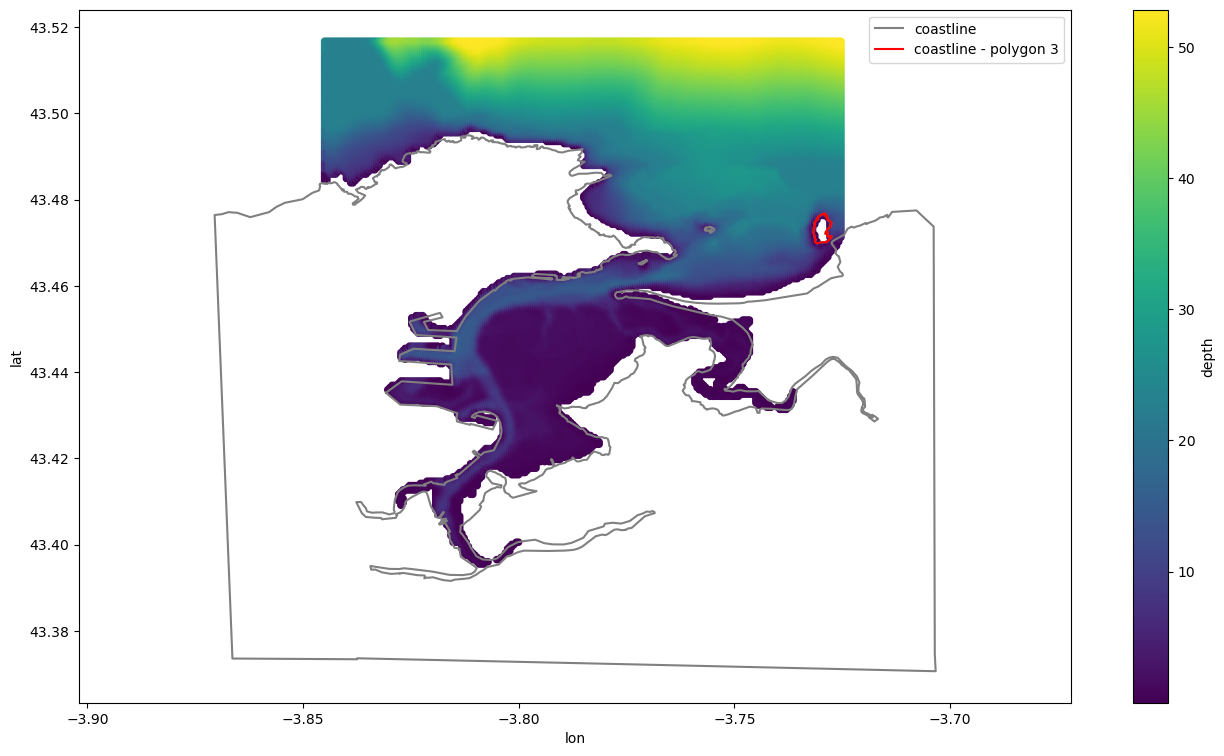

In [16]:
ax = grid.plot.scatter(x="lon", y="lat", c="depth", figsize=(16,9))
# plt.fill(coast["lon"], coast["lat"], color="grey")
coast.plot.line(ax=ax, x="lon", y="lat", color="grey", label="coastline")
coast.loc[[i]].plot.line(ax=ax, x="lon", y="lat", color="r", label=f"coastline - polygon {i}")
ax.axis("equal")